# CS105 Mini Project - Team 2

## Topic

Our topic for this mini project focuses on GPA, future prospects after college, why students chose their major, and whether they study alone or in groups. We will analyze the answers to these questions to see if we can find any statistically significant relations between them and find any patterns via creating visualizations and running numerical analyses. 

## The data we have

We will be using the columns "What is your current cumulative GPA?", "Do you prefer studying and/or working in groups?", "Do you want to be involved in STEM-based research?", "If you're in CS/CE/Data Science/related, why did you pick this path?" from the Spr23 Combined Questionnaire (Responses) form for our analyses. As of writing, we have 162 data points for each of these columns, not excluding missing entries. 


## What we want to know

Ultimately, we'd like to know if GPA is affected by the responses to all other previously mentioned survey questions listed above. Formaly, we want to see if there is a statistically significant relationship between these responses and GPA. We also would like to find patterns in this data by creating visualizations from it, i.e., plotting if students study alone or in groups and reasons for picking CS and seeing if there are any discrepencies.

## Visualizations and computations

In [1]:
#Cleaning the data by removing all unnesessary columns and the first data point that is all null values
import pandas as pd
import matplotlib as plt
df = pd.read_csv("data.csv")
df = df[["What is your current cumulative GPA?", "If you\'re in CS/CE/Data Science/related, why did you pick this path?\r\n", "Do you prefer studying and/or working in groups? ", "Do you want to be involved in STEM-based research?"]].fillna(0)
df = df.iloc[1:162]
#pd.options.display.max_rows = None
df.head()

,What is your current cumulative GPA?,"If you're in CS/CE/Data Science/related, why did you pick this path?\r\n",Do you prefer studying and/or working in groups?,Do you want to be involved in STEM-based research?
1,3.0-3.3,Jobs are in high demand,Sometimes,Yes
2,3.3-3.6,You find topics in this field interesting,No,Yes
3,3.3-3.6,"You find topics in this field interesting, Mor...",Sometimes,No
4,2.6-3.0,"You find topics in this field interesting, Job...",Sometimes,Yes
5,3.6-4.0,"You find topics in this field interesting, Job...",Sometimes,Yes


C:\Users\Alex\AppData\Local\Temp\ipykernel_8908\3518772317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Yes'] = df2[df2['Do you want to be involved in STEM-based research?'] == 'Yes']


What is your current cumulative GPA?
2.3-2.6    1.0
2.6-3.0    1.0
3.0-3.3    1.0
3.3-3.6    1.0
3.6-4.0    1.0
dtype: float64


Text(0, 0.5, 'Do you want to be involved in STEM-based research?')

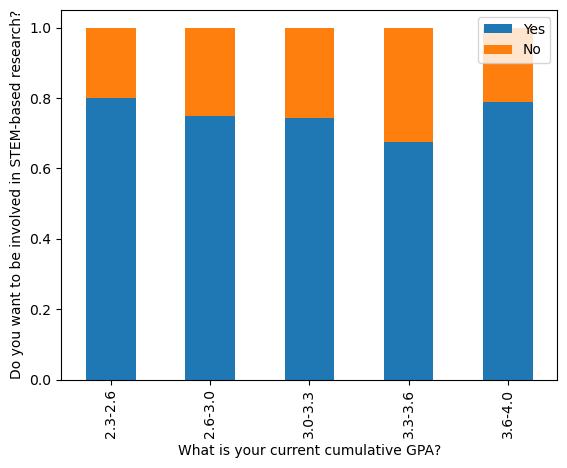

In [2]:
df1 = df[['What is your current cumulative GPA?', 'Do you want to be involved in STEM-based research?']]
df2 = df[['Do you want to be involved in STEM-based research?']]
df1['Yes'] = df2[df2['Do you want to be involved in STEM-based research?'] == 'Yes']
df1['No'] = df2[df2['Do you want to be involved in STEM-based research?'] == 'No']

df1 = df1[['What is your current cumulative GPA?', 'Yes', 'No']]
grouped = df1.groupby('What is your current cumulative GPA?').count()

temp = grouped['Yes']
grouped['Yes'] = grouped['Yes'] / grouped.sum(axis = 1)
grouped['No'] = grouped['No'] / (temp + grouped['No'])

print(grouped.sum(axis = 1))
grouped.plot.bar(stacked = True).set_ylabel('Do you want to be involved in STEM-based research?')

In [3]:
#Since our gpa values are ranges, we need to convert them to a single value
def gpa_range_to_avg(gpa_range):
    first, second = map(float, gpa_range.split('-'))
    return (first + second) / 2

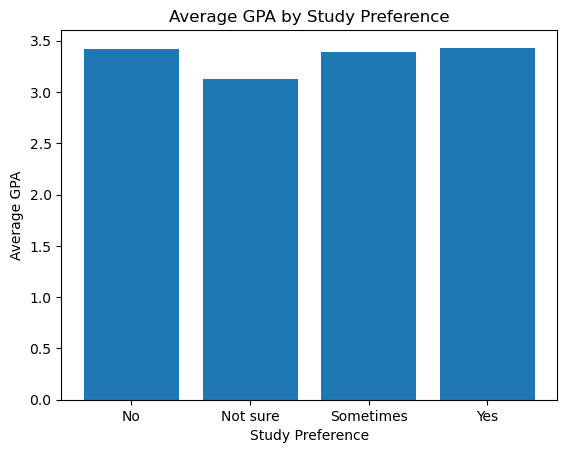

In [4]:
import matplotlib.pyplot as plt

df["gpa"] = df["What is your current cumulative GPA?"].apply(gpa_range_to_avg)
study_pref_mean = df.groupby("Do you prefer studying and/or working in groups? ")["gpa"].mean() 

plt.bar(study_pref_mean.index, study_pref_mean.values)
plt.xlabel("Study Preference")
plt.ylabel("Average GPA")
plt.title("Average GPA by Study Preference")
plt.show()

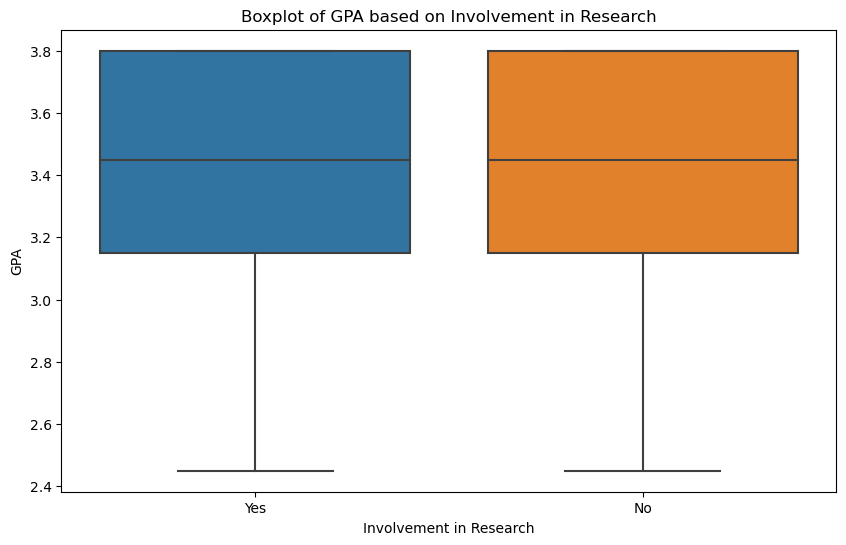

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df[df["Do you want to be involved in STEM-based research?"] != 0]

plt.figure(figsize=(10, 6))
sns.boxplot(x="Do you want to be involved in STEM-based research?", y="gpa", data=df)
plt.title('Boxplot of GPA based on Involvement in Research')
plt.ylabel('GPA')
plt.xlabel('Involvement in Research')
plt.show()

Text(0, 0.5, 'Number of participants')

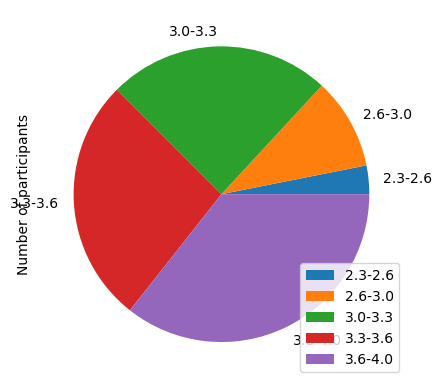

In [6]:
df1 = df[['What is your current cumulative GPA?', 'Do you want to be involved in STEM-based research?']]
grouped = df1.groupby('What is your current cumulative GPA?').count()
grouped.plot.pie(y = 'Do you want to be involved in STEM-based research?').set_ylabel('Number of participants')

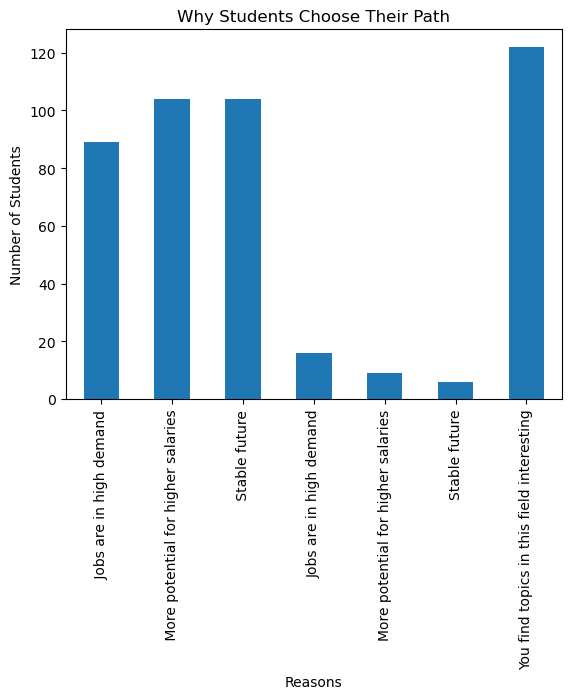

In [7]:
df = df[df["If you\'re in CS/CE/Data Science/related, why did you pick this path?\r\n"] != 0]

df_split = df["If you\'re in CS/CE/Data Science/related, why did you pick this path?\r\n"].str.get_dummies(',')

df_split.sum().plot(kind='bar', stacked=True)
plt.title('Why Students Choose Their Path')
plt.xlabel('Reasons')
plt.ylabel('Number of Students')
plt.show()

Text(0.5, 1.0, 'Heatmap of GPA distribution ')

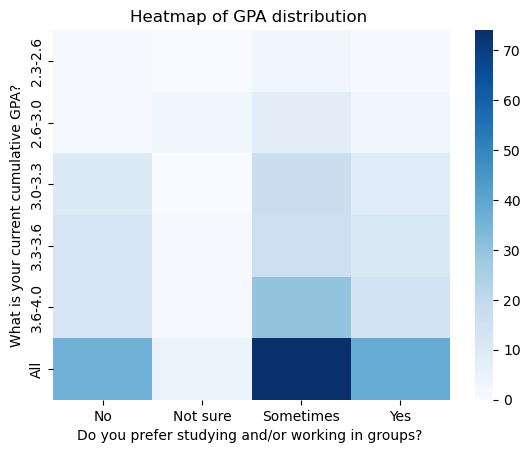

In [8]:
studypreference_joint = pd.crosstab(df['What is your current cumulative GPA?'], df['Do you prefer studying and/or working in groups? '], margins = True)
studypreference_joint = studypreference_joint[['No', 'Not sure', 'Sometimes', 'Yes']]
sns.heatmap(studypreference_joint, cmap="Blues")
plt.title("Heatmap of GPA distribution ")

<function matplotlib.pyplot.show(close=None, block=None)>

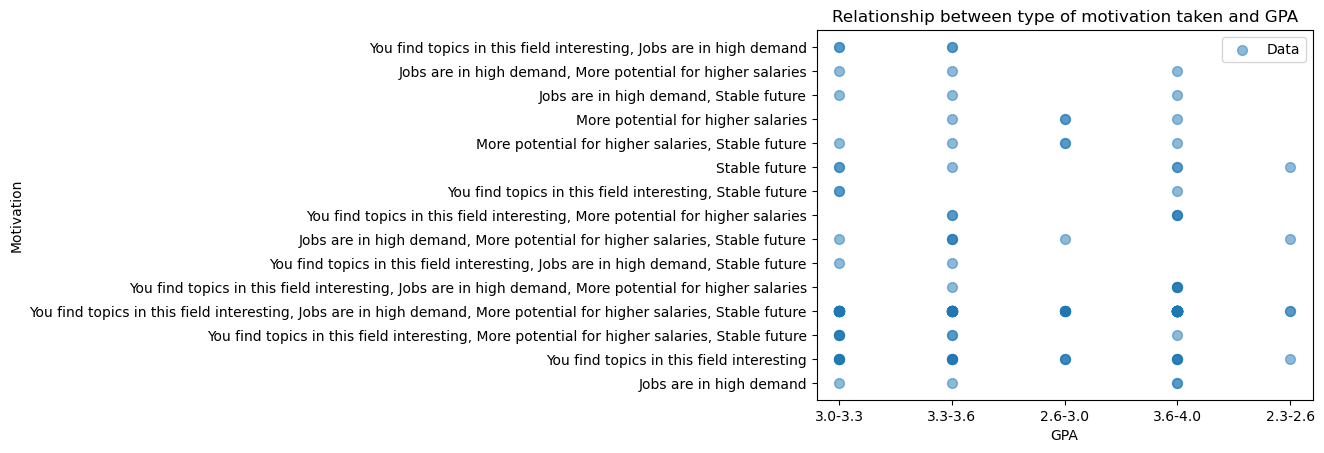

In [9]:
plt.scatter (df['What is your current cumulative GPA?'],df["If you're in CS/CE/Data Science/related, why did you pick this path?\r\n"], alpha=0.5,s=50, label="Data")
plt.xlabel ("GPA" )
plt.ylabel ("Motivation")
plt.title("Relationship between type of motivation taken and GPA")
plt.legend()
plt.show

AttributeError: 'set' object has no attribute 'get'

## Hypotheses

We will present our hypotheses in the form of null hypotheses: <br> - There is no statistically significant relationship between why students chose CS and their GPA <br> - There is no statistically significant relationship between whether students study alone or in groups and their GPA <br> - There is no statistically significant relationship between student involvement in STEM-based research and their GPA

In [ ]:
import scipy.stats as stats

crosstab = pd.crosstab(df["Do you prefer studying and/or working in groups? "], df["What is your current cumulative GPA?"])
display(crosstab)
print(stats.chi2_contingency(crosstab))

We are using the Chi-squared test for correlation to see if studying alone/in a group correlates with GPA. As we can see, we have a statistic of 17.9, but we need 18.55 for it to be significant. Therefore, we can reject the null hypothesis that there is no statistically significant relationship between why students chose CS and their GPA.

In [ ]:
crosstab = pd.crosstab(df["Do you want to be involved in STEM-based research?"], df["What is your current cumulative GPA?"])
display(crosstab)
print(stats.chi2_contingency(crosstab))

We are using the Chi-squared test for correlation to see if wanting to be involved in STEM research correlates with GPA. As we can see, we have a statistic of 1.79. This is not high enough to reject the null hypothesis that there is no statistically significant relationship between student involvement in STEM-based research and their GPA.

In [ ]:
df = df[["What is your current cumulative GPA?", "If you're in CS/CE/Data Science/related, why did you pick this path?\r\n"]]

rows = [" Jobs are in high demand", " More potential for higher salaries", " Stable future", "You find topics in this field interesting"]
columns = ["2.3-2.6", "2.6-3.0", "3.0-3.3", "3.3-3.6", "3.6-4.0"]
new_data = [
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
]

for index, row in df.iterrows():
    if isinstance(row["If you're in CS/CE/Data Science/related, why did you pick this path?\r\n"], int):
        continue
    responses = row["If you're in CS/CE/Data Science/related, why did you pick this path?\r\n"].split(",")
    gpa = row["What is your current cumulative GPA?"]
    
    column = 0
    if gpa == "2.3-2.6":
        column = 0
    elif gpa == "2.6-3.0":
        column = 1
    elif gpa == "3.0-3.3": 
        column = 2
    elif gpa == "3.3-3.6":
        column = 3
    else:
        column = 4
        
    for response in responses:
        if response == " Jobs are in high demand" or response == "Jobs are in high demand":
            new_data[0][column] += 1
        elif response == " More potential for higher salaries" or response == "More potential for higher salaries":
            new_data[1][column] += 1
        elif response == " Stable future" or response == "Stable future":
            new_data[2][column] += 1
        else:
            new_data[3][column] += 1
            
df = pd.DataFrame(new_data, index=rows, columns=columns)
display(df)
print(stats.chi2_contingency(df))

We are using the Chi-squared test for correlation to see if reasons for going into CS correlates with GPA. As we can see, we have a statistic of 2.14. This is not high enough to reject the null hypothesis that there is no statistically significant relationship between reasons for going into CS and their GPA